# Imports and Settings

In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

from ManifoldHMCAlgorithms.mixture_manifoldhmc import MHMC_AdaptiveNoKernel
from Manifolds.RotatedEllipse import RotatedEllipse
from utils import quick_MVN_scatter, quick_MVN_marginals
from Zappa.zappa import zappa_adaptive
from utils import update_scale_sa, logf_Jacobian

In [2]:
# Settings
s = 0.5
N = 1000000
n = 1
m = 100
tol = 1.48e-08
a_guess = 1.0
ap_star = 0.6
alpha = 0.2
M = np.eye(2)
T = 5
epsilon = 0.1

# Target Distribution
mu = np.zeros(2)
Sigma = np.array([[1.0, 0.99], [0.99, 2.0]]) 
target = multivariate_normal(mean=mu, cov=Sigma)

# Initial point and contour
x = target.rvs()
z = target.pdf(x)
ellipse = RotatedEllipse(mu, Sigma, z)

# Mixture Manifold with Adaptive Zappa

In [3]:
samples = MHMC_AdaptiveNoKernel(x, alpha, N, n, m, Sigma, mu, T, epsilon, M, s, tol, a_guess, ap_star)

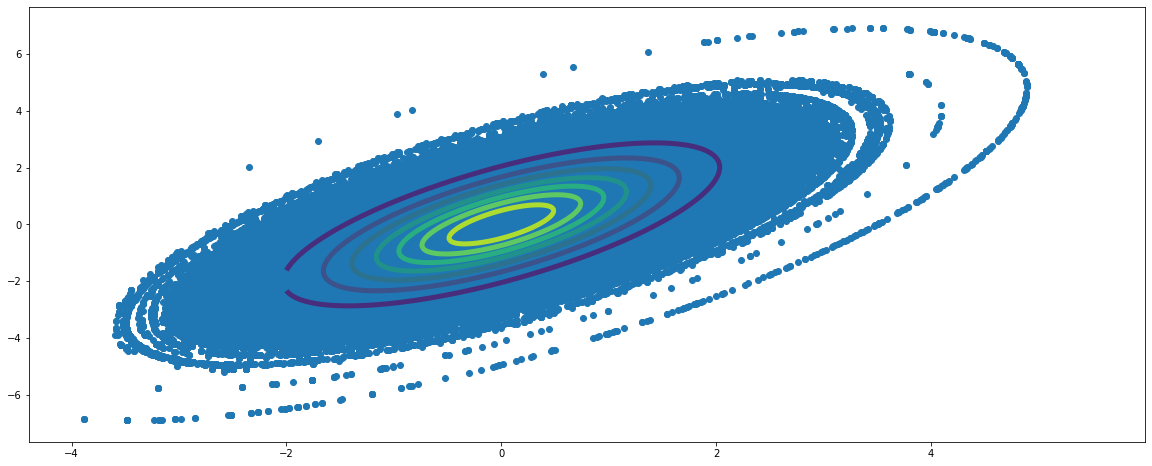

In [4]:
quick_MVN_scatter(samples, target)

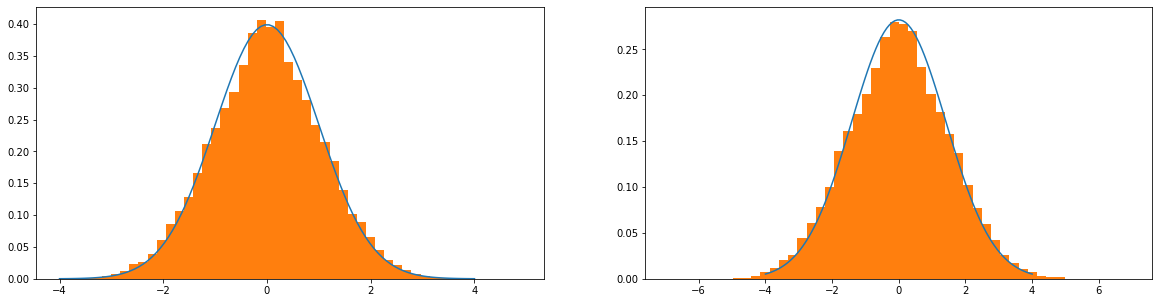

In [5]:
quick_MVN_marginals(samples, target)

# Test Zappa Adaptive

In [21]:
incr = 0.001
x = mu + incr
z = target.pdf(x)
ellipse = RotatedEllipse(mu, Sigma, z)
logf = lambda xy: logf_Jacobian(xy, Sigma)
xlims = (-incr*5, incr*5)
ylims = (-incr*5, incr*5)
step = incr / 100
za_samples = zappa_adaptive(x, ellipse, logf, 50, s, tol, a_guess, ap_star, update_scale_sa)

Notice how it takes a while before we have learned the right scaling. For instance 50 steps might not be enough

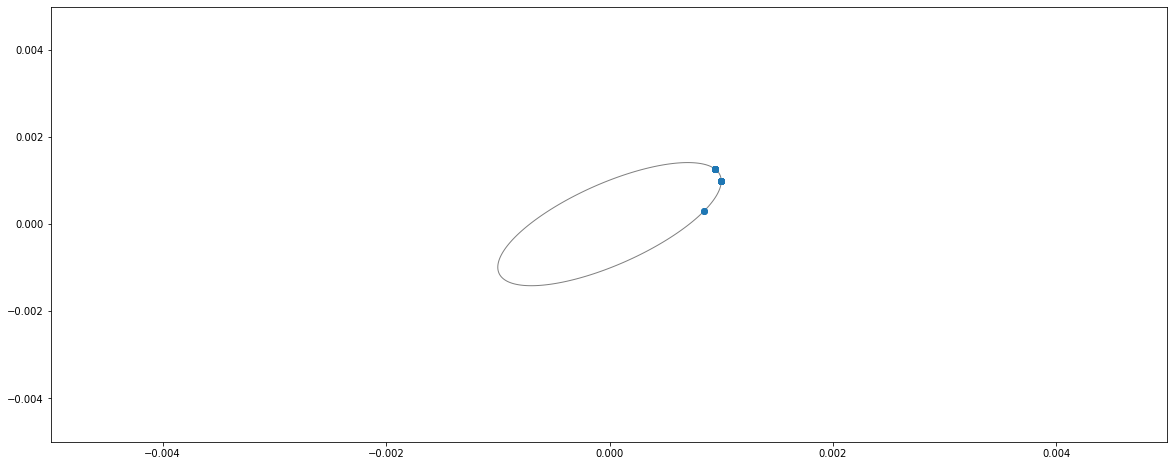

In [23]:
quick_MVN_scatter(za_samples, target, xlims, ylims, levels=[z], step=step, lw=1)

While 300 steps might be better

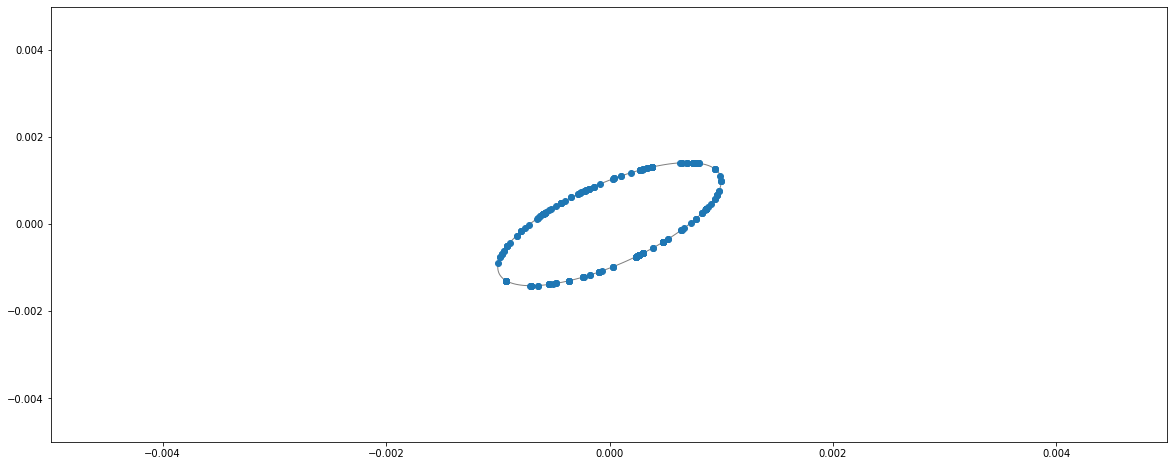

In [26]:
za_samples = zappa_adaptive(x, ellipse, logf, 300, s, tol, a_guess, ap_star, update_scale_sa)
quick_MVN_scatter(za_samples, target, xlims, ylims, levels=[z], step=step, lw=1)